## Data Preprocessing

On va partir sur des intervalles d'un mois et d'un jour i.e. $\Delta t = 1 \text{ jour}$

Chaque input sera une matrice 
$$
X_{t}=\left(\begin{array}{c}
x_{t}^{(1)} \\
\vdots \\
x_{t}^{(m)}
\end{array}\right)
$$  
avec $ \forall i \in [|1, m|], x_{t}^{(i)} \in \mathbb{R}^{1\times n_f}$ où $n_f$ est le nombre de features retenues et m est le nombre de zones.

Je veux retenir les features suivantes :
* nombre de sinistres
* nombre de sinistres d'intensité $M_c \in [3.5, 5[$ `mag1`
* nombre de sinistres d'intensité $M_c \in [5, 6[$ `mag2`
* nombre de sinistres d'intensité $M_c \in [6, 7[$ `mag3`
* nombre de sinistres d'intensité $M_c \geq 7$ `mag4`
* nombre de sinistres de profondeur $D \leq 80$ `depth1` 
* nombre de sinistres de profondeur $D \in [80, 200[$ `depth2`
* nombre de sinistres de profondeur $D \in [200, 450[$ `depth3` 
* nombre de sinistres de profondeur $D \geq 450$ `depth4`  
On ajoute également toutes les features de zones, sous la forme d'un One Hot Encoder.

In [18]:
import numpy as np
import pandas as pd

In [19]:
data = pd.read_csv("data.csv")

<AxesSubplot:xlabel='depth', ylabel='Count'>

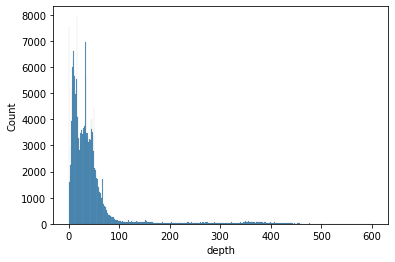

In [3]:
import seaborn as sns

sns.histplot(data.depth)

In [20]:
data.head()

,Unnamed: 0,year,month,date,hour,minute,seconds,lat,long,depth,class,zone
0,0,1990,1,1,2,19,5.018,42.2734,144.8460,8.0,2.9,96
1,1,1990,1,1,4,4,20.026,39.9358,142.5461,30.6,3.0,154
2,2,1990,1,1,7,14,11.038,36.7053,141.2990,18.6,2.7,213
3,3,1990,1,1,9,3,12.039,36.4859,140.6964,67.2,4.3,212
4,4,1990,1,1,12,31,25.018,35.0121,138.1440,22.6,2.5,230


In [21]:
data.drop(["Unnamed: 0"], axis=1, inplace=True)

In [6]:
data

,year,month,date,hour,minute,seconds,lat,long,depth,class,zone
0,1990,1,1,2,19,5.018,42.2734,144.8460,8.0,2.9,96
1,1990,1,1,4,4,20.026,39.9358,142.5461,30.6,3.0,154
2,1990,1,1,7,14,11.038,36.7053,141.2990,18.6,2.7,213
3,1990,1,1,9,3,12.039,36.4859,140.6964,67.2,4.3,212
4,1990,1,1,12,31,25.018,35.0121,138.1440,22.6,2.5,230
...,...,...,...,...,...,...,...,...,...,...,...
247469,2016,3,22,5,34,23.010,36.8300,140.5200,10.0,4.7,212
247470,2016,3,24,7,57,38.010,43.2500,145.6100,109.0,4.2,77
247471,2016,3,30,5,9,59.000,42.9100,144.7900,59.0,4.7,96
247472,2016,3,31,2,48,25.000,36.0600,140.2600,70.0,4.3,212


In [22]:
data["mag1"] = data['class'].apply(lambda x: (x >= 3.5 and x < 5))
data["mag2"] = data['class'].apply(lambda x: (x >= 5 and x < 6))
data["mag3"] = data['class'].apply(lambda x: (x >= 6 and x < 7))
data["mag4"] = data['class'].apply(lambda x: (x >= 7))

In [8]:
data

,year,month,date,hour,minute,seconds,lat,long,depth,class,zone,mag1,mag2,mag3,mag4
0,1990,1,1,2,19,5.018,42.2734,144.8460,8.0,2.9,96,False,False,False,False
1,1990,1,1,4,4,20.026,39.9358,142.5461,30.6,3.0,154,False,False,False,False
2,1990,1,1,7,14,11.038,36.7053,141.2990,18.6,2.7,213,False,False,False,False
3,1990,1,1,9,3,12.039,36.4859,140.6964,67.2,4.3,212,True,False,False,False
4,1990,1,1,12,31,25.018,35.0121,138.1440,22.6,2.5,230,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247469,2016,3,22,5,34,23.010,36.8300,140.5200,10.0,4.7,212,True,False,False,False
247470,2016,3,24,7,57,38.010,43.2500,145.6100,109.0,4.2,77,True,False,False,False
247471,2016,3,30,5,9,59.000,42.9100,144.7900,59.0,4.7,96,True,False,False,False
247472,2016,3,31,2,48,25.000,36.0600,140.2600,70.0,4.3,212,True,False,False,False


In [23]:
data["depth1"] = data['depth'].apply(lambda x: x < 80)
data["depth2"] = data['depth'].apply(lambda x: (x >= 80 and x < 200))
data["depth3"] = data['depth'].apply(lambda x: (x >= 200 and x < 450))
data["depth4"] = data['depth'].apply(lambda x: x >= 450)

In [10]:
data.head()

,year,month,date,hour,minute,seconds,lat,long,depth,class,zone,mag1,mag2,mag3,mag4,depth1,depth2,depth3,depth4
0,1990,1,1,2,19,5.018,42.2734,144.8460,8.0,2.9,96,False,False,False,False,True,False,False,False
1,1990,1,1,4,4,20.026,39.9358,142.5461,30.6,3.0,154,False,False,False,False,True,False,False,False
2,1990,1,1,7,14,11.038,36.7053,141.2990,18.6,2.7,213,False,False,False,False,True,False,False,False
3,1990,1,1,9,3,12.039,36.4859,140.6964,67.2,4.3,212,True,False,False,False,True,False,False,False
4,1990,1,1,12,31,25.018,35.0121,138.1440,22.6,2.5,230,False,False,False,False,True,False,False,False


In [24]:
data.drop(["hour", "minute", "seconds"], axis=1, inplace=True)

In [25]:
data.head()

,year,month,date,lat,long,depth,class,zone,mag1,mag2,mag3,mag4,depth1,depth2,depth3,depth4
0,1990,1,1,42.2734,144.8460,8.0,2.9,96,False,False,False,False,True,False,False,False
1,1990,1,1,39.9358,142.5461,30.6,3.0,154,False,False,False,False,True,False,False,False
2,1990,1,1,36.7053,141.2990,18.6,2.7,213,False,False,False,False,True,False,False,False
3,1990,1,1,36.4859,140.6964,67.2,4.3,212,True,False,False,False,True,False,False,False
4,1990,1,1,35.0121,138.1440,22.6,2.5,230,False,False,False,False,True,False,False,False


In [26]:
data.rename(columns={"date":"day"}, inplace=True)

In [27]:
data["date"] = pd.to_datetime(data[["year", "month", "day"]])

In [24]:
data.head()

,year,month,day,lat,long,depth,class,zone,mag1,mag2,mag3,mag4,depth1,depth2,depth3,depth4,date
0,1990,1,1,42.2734,144.8460,8.0,2.9,96,False,False,False,False,True,False,False,False,1990-01-01
1,1990,1,1,39.9358,142.5461,30.6,3.0,154,False,False,False,False,True,False,False,False,1990-01-01
2,1990,1,1,36.7053,141.2990,18.6,2.7,213,False,False,False,False,True,False,False,False,1990-01-01
3,1990,1,1,36.4859,140.6964,67.2,4.3,212,True,False,False,False,True,False,False,False,1990-01-01
4,1990,1,1,35.0121,138.1440,22.6,2.5,230,False,False,False,False,True,False,False,False,1990-01-01


In [26]:
data.date.dt.dayofyear

0          1
1          1
2          1
3          1
4          1
          ..
247469    82
247470    84
247471    90
247472    91
247473    95
Name: date, Length: 247474, dtype: int64

On utilisera dateofyear avec year pour obtenir toutes les matrices $X_t$

In [31]:
d1 = data[(data.year == 1990) & (data.date.dt.dayofyear == 1)]

In [32]:
d1

,year,month,day,lat,long,depth,class,zone,mag1,mag2,mag3,mag4,depth1,depth2,depth3,depth4,date
0,1990,1,1,42.2734,144.8460,8.0,2.9,96,False,False,False,False,True,False,False,False,1990-01-01
1,1990,1,1,39.9358,142.5461,30.6,3.0,154,False,False,False,False,True,False,False,False,1990-01-01
2,1990,1,1,36.7053,141.2990,18.6,2.7,213,False,False,False,False,True,False,False,False,1990-01-01
3,1990,1,1,36.4859,140.6964,67.2,4.3,212,True,False,False,False,True,False,False,False,1990-01-01
4,1990,1,1,35.0121,138.1440,22.6,2.5,230,False,False,False,False,True,False,False,False,1990-01-01
5,1990,1,1,35.1802,136.5092,11.0,2.5,228,False,False,False,False,True,False,False,False,1990-01-01
6,1990,1,1,39.8000,143.7200,0.0,3.0,155,False,False,False,False,True,False,False,False,1990-01-01


In [38]:
def to_input_data(year: int, dayofyear: int):
    """Renvoie la sparse matrix X_t correspondant"""
    X = np.zeros((360, 9))
    d = data[(data.year == year) & (data.date.dt.dayofyear == dayofyear)]
    for tup in d.itertuples():
        zone = tup.zone
        X[zone, 0] += 1  # nombre de sinistres sur la période
        X[zone, 1] += tup.mag1  # nombre de sinistre de catégorie mag1
        X[zone, 2] += tup.mag2  # nombre de sinistre de catégorie mag2
        X[zone, 3] += tup.mag3  # nombre de sinistre de catégorie mag3
        X[zone, 4] += tup.mag4  # nombre de sinistre de catégorie mag4
        X[zone, 5] += tup.depth1
        X[zone, 6] += tup.depth2
        X[zone, 7] += tup.depth3
        X[zone, 8] += tup.depth4

    return X

In [28]:
def to_input_data_by_month(year: int, month: int):
    """Renvoie la sparse matrix X_t correspondant"""
    X = np.zeros((360, 9))
    d = data[(data.year == year) & (data.month == month)]
    for tup in d.itertuples():
        zone = tup.zone
        X[zone, 0] += 1  # nombre de sinistres sur la période
        X[zone, 1] += tup.mag1  # nombre de sinistre de catégorie mag1
        X[zone, 2] += tup.mag2  # nombre de sinistre de catégorie mag2
        X[zone, 3] += tup.mag3  # nombre de sinistre de catégorie mag3
        X[zone, 4] += tup.mag4  # nombre de sinistre de catégorie mag4
        X[zone, 5] += tup.depth1
        X[zone, 6] += tup.depth2
        X[zone, 7] += tup.depth3
        X[zone, 8] += tup.depth4

    return X

In [40]:
import torch

Je créee le tensor final contenant les données : $ D_x = \left\{X_t, 1 \leq t \leq n\right\} $ avec $n$ le nombre de vecteur $X_t$, soit, le nombre de jours entre le 1er janvier 1990 et le 4 avril 2016.

In [29]:
from itertools import product

# indices entre 01/01/1990 et 31/01/2015 (on ignore les années bissextiles)
dates_1 = list(product(list(range(1990, 2016)), list(range(1, 366))))

In [59]:
# indices entre 01/01/2016 et 04/04/2016 (= 95 ème jour)
dates_2 = [(2016, i) for i in range(96)]

In [60]:
dates = dates_1 + dates_2

In [61]:
len(dates)

9586

In [62]:
X_tot = []
for y, d in dates:
    X_tot.append(to_input_data(y, d))

In [65]:
XX_tot = torch.stack([torch.from_numpy(X_tot[i]) for i in range(len(X_tot))])

In [79]:
XX_tot = XX_tot.type(torch.uint8)

In [80]:
torch.save(XX_tot, 'tensor_1990_2016_1d.pt')

In [81]:
XX_tot.max(1)

torch.return_types.max(
values=tensor([[1, 1, 0,  ..., 0, 0, 0],
        [4, 1, 0,  ..., 1, 0, 0],
        [2, 1, 0,  ..., 1, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [1, 1, 0,  ..., 0, 0, 0]], dtype=torch.uint8),
indices=tensor([[ 96, 212,   0,  ...,   0,   0,   0],
        [154,  78,   0,  ..., 133,   0,   0],
        [233, 211,   0,  ..., 211,   0,   0],
        ...,
        [  0,   0,   0,  ...,   0,   0,   0],
        [  0,   0,   0,  ...,   0,   0,   0],
        [153, 153,   0,  ...,   0,   0,   0]]))

Pareil avec $\Delta _t = 1 \text{ mois} $

In [31]:
date_m = list(product(list(range(1990, 2016)), list(range(1, 13)))) + [(2016, 1), (2016, 2), (2016, 3), (2016, 4)]

In [32]:
len(date_m)

316

In [33]:
X_m = []
for y, m in date_m:
    X_m.append(to_input_data_by_month(y, m))

In [36]:
Xm_tot = torch.stack([torch.from_numpy(X_m[i]) for i in range(len(X_m))])

In [37]:
Xm_tot = Xm_tot.type(torch.uint8)

In [39]:
Xm_tot.shape

torch.Size([316, 360, 9])

In [52]:
Xm_tot.sum(axis=0)

tensor([[633, 234,  35,  ...,  24,  27,   8],
        [  0,   0,   0,  ...,   0,   0,   0],
        [  0,   0,   0,  ...,   0,   0,   0],
        ...,
        [  0,   0,   0,  ...,   0,   0,   0],
        [  0,   0,   0,  ...,   0,   0,   0],
        [  0,   0,   0,  ...,   0,   0,   0]])

In [65]:
Xm_tot[0].sum(0) # EQ totaux au 01/1990

tensor([224,  52,   5,   0,   0, 221,   3,   0,   0])

In [68]:
Xm_tot.sum(2)[0] # EQ par région au 01/1990 (mais sans distinction entre mag depth etc...)

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  3,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  3,  6,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  8,  2,  4, 10,  7,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  3,  8,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  8, 30,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  4,  4,  2, 39, 99,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  4,  9, 10,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  2,  2,  3, 16, 18,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0, 23,  0, 15, 19, 38,  2,  0,
         0,  0,  0,  0,  0,  0,  0,  0, 

In [77]:
Xm_tot.sum(2).shape  # les fetures ont bien disparues

torch.Size([316, 360])

In [78]:
torch.save(Xm_tot, 'tensor_1990_2016_1m.pt')

## LSTM

Notre but est d'estimer les magnitudes et profondeurs de sinistres sur une période d'un an. Comme notre pas de temps est de 1 jour, il faut donc faire environ 360 prédictions.

### C'est trop compliqué. Plan B, on récupère que les EQ de mag > 5 sur la base de données de 1960-2022

In [1]:
import torch
import torch.nn as nn

In [2]:
X = torch.load("tensor_1990_2016_1d.pt")

In [4]:
X.shape

torch.Size([9586, 360, 9])

Nous allons séparer le test set du training set avec un split d'environ 80 / 20. X_train contiendra 8000 données et X_test en contiendra 1586.

In [8]:
X_train, X_test = X[:8000], X[8000:]

In [9]:
X_test.shape

torch.Size([1586, 360, 9])

In [89]:
from torch.utils.data import Dataset

# Permet d'obtenir les sequence_length données précédentes (s'occupe du padding)
class SequenceDataset(Dataset):
    def __init__(self, X, y, sequence_length=5):
        self.sequence_length = sequence_length
        self.y = y
        self.X = X

    def __len__(self):
        return self.X.shape[0]

    def __getitem__(self, i): 
        if i >= self.sequence_length - 1:
            i_start = i - self.sequence_length + 1
            x = self.X[i_start:(i + 1), :]
        else:
            padding = self.X[0].repeat(self.sequence_length - i - 1, 1)
            x = self.X[0:(i + 1), :]
            x = torch.cat((padding, x), 0)

        return x, self.y

In [90]:
i = 100
sequence_length = 30

data = SequenceDataset(X_train, X_train[i], sequence_length)

X, y = data[i]
print(X)

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0,

In [93]:
X.shape

torch.Size([30, 360, 9])

In [102]:
class LSTMPredictor(nn.Module):
    def __init__(self, n_hidden=51):
        super(LSTMPredictor, self).__init__()
        self.n_hidden = n_hidden
        # lstm1, lstm2, linear
        self.lstm1 = nn.LSTMCell(1, self.n_hidden)
        self.lstm2 = nn.LSTMCell(self.n_hidden, self.n_hidden)
        self.linear = nn.Linear(self.n_hidden, 1)

    def forward(self, x, future=0):
        outputs = []
        n_samples = x.size(0)

        h_t = torch.zeros(n_samples, self.n_hidden, dtype=torch.uint8)
        c_t = torch.zeros(n_samples, self.n_hidden, dtype=torch.uint8)
        h_t2 = torch.zeros(n_samples, self.n_hidden, dtype=torch.uint8)
        c_t2 = torch.zeros(n_samples, self.n_hidden, dtype=torch.uint8)

        for input_t in x.split(1, dim=1):
            h_t, c_t = self.lstm1(input_t, (h_t, c_t))
            h_t2, c_t2 = self.lstm2(h_t, (h_t2, c_t2))
            output = self.linear(h_t2)
            outputs.append(output)

        for i in range(future):
            h_t, c_t = self.lstm1(output, (h_t, c_t))
            h_t2, c_t2 = self.lstm2(h_t, (h_t2, c_t2))
            output = self.linear(h_t2)
            outputs.append(output)

        outputs = torch.cat(outputs, dim=1)
        return outputs

In [103]:
train_input = X_train[:-100]
train_target = X_train[1:]
test_input = X_test[:-100]
test_target = X_test[1:]

In [104]:
model = LSTMPredictor()
criterion = nn.MSELoss()
optimizer = optim.LBFGS(model.parameters(), lr=.8)

NameError: name 'optim' is not defined